In [25]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df=pd.read_csv("train_csv.csv")
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [27]:
df.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


In [28]:
df.count()

id         80
time       80
feature    80
dtype: int64

In [29]:
df.dtypes

id           int64
time        object
feature    float64
dtype: object

In [30]:
df.time=pd.to_datetime(df.time)
df.head(3)

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53


In [31]:
df.dtypes

id                  int64
time       datetime64[ns]
feature           float64
dtype: object

In [32]:
%matplotlib inline

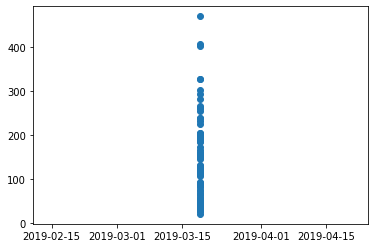

In [33]:
plt.scatter(df.time,df.feature)

In [34]:
df1=df.drop(['id'],axis=1)
df1.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [35]:
df1.dtypes

time       datetime64[ns]
feature           float64
dtype: object

In [36]:
df1['year']=df1.time.dt.year
df1['month']=df1.time.dt.month
df1['day']=df1.time.dt.day
df1['hour']=df1.time.dt.hour
df1['min']=df1.time.dt.minute
df1['second']=df1.time.dt.second

In [37]:
x=df1[['year','month','day','hour','min','second']]
y=df1['feature']

In [38]:
x.head()

,year,month,day,hour,min,second
0,2019,3,19,0,0,0
1,2019,3,19,0,0,10
2,2019,3,19,0,0,20
3,2019,3,19,0,0,30
4,2019,3,19,0,0,40


In [39]:
y.head()

0    237.97
1     57.93
2     90.53
3    260.75
4     49.70
Name: feature, dtype: float64

In [40]:
x.head()

,year,month,day,hour,min,second
0,2019,3,19,0,0,0
1,2019,3,19,0,0,10
2,2019,3,19,0,0,20
3,2019,3,19,0,0,30
4,2019,3,19,0,0,40


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [42]:
x_train.head()

,year,month,day,hour,min,second
42,2019,3,19,0,7,0
39,2019,3,19,0,6,30
44,2019,3,19,0,7,20
31,2019,3,19,0,5,10
67,2019,3,19,0,11,10


In [43]:
y_train.head()

42     94.31
39    123.41
44    184.75
31    266.69
67    173.72
Name: feature, dtype: float64

In [44]:
df1.shape

(80, 8)

In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.score(x_train,y_train)

0.14844053750904906